In [14]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List
import numpy as np
from functools import reduce
from scipy.stats import mode
from itertools import groupby
import io
from google.colab import files

uploaded = files.upload()

Saving metacritic_games_cleaned.csv to metacritic_games_cleaned.csv


In [16]:
def get_cmap(n, name="hsv"):
    """Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name."""
    return plt.cm.get_cmap(name, n)


def scatter_group_by(
    df: pd.DataFrame, x_column: str, y_column: str, label_column: str
):
    fig, ax = plt.subplots()
    labels = pd.unique(df[label_column])
    cmap = get_cmap(len(labels) + 1)
    for i, label in enumerate(labels):
        filter_df = df.query(f"{label_column} == '{label}'")
        ax.scatter(filter_df[x_column], filter_df[y_column], label=label, color=cmap(i))
    ax.legend()
    # plt.savefig(file_path)
    plt.show()
    plt.close()


def euclidean_distance(p_1: np.array, p_2: np.array) -> float:
    return np.sqrt(np.sum((p_2 - p_1) ** 2))


def k_nearest_neightbors(
    points: List[np.array], labels: np.array, input_data: List[np.array], k: int
):
    input_distances = [
        [euclidean_distance(input_point, point) for point in points]
        for input_point in input_data
    ]
    points_k_nearest = [
        np.argsort(input_point_dist)[:k] for input_point_dist in input_distances
    ]
    return [
        mode([labels[index] for index in point_nearest])
        for point_nearest in points_k_nearest
    ]

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['metacritic_games_cleaned.csv']))
df.head()

,game,platform,developer,genre,rating,release_date,metascore,user_score
0,Portal 2,PC,Valve Software,Action,E10+,"Apr 18, 2011",95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,M,"Nov 10, 2011",94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,E10+,"Jun 19, 2011",94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,T,"Nov 21, 2011",91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,E,"Nov 13, 2011",90,84


In [13]:
stats_subset = df[['release_date', 'metascore', 'user_score' ]]

for index in stats_subset.index:
    stats_subset.loc[index,['release_date']] = stats_subset.loc[index]['release_date'][8:]
    if(stats_subset.loc[index]['metascore'] > 80):
      stats_subset.loc[index,['group']] = "Good"
    elif(stats_subset.loc[index]['metascore'] > 45):
      stats_subset.loc[index,['group']] = "Medium"
    else:
      stats_subset.loc[index,['group']] = "Bad"

new_subset = stats_subset[['release_date', 'metascore', 'group' ]]
new_subset.head()

,release_date,metascore,group
0,2011,95,Good
1,2011,94,Good
2,2011,94,Good
3,2011,91,Good
4,2011,90,Good


<ipython-input-16-5311147554d0>:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(name, n)


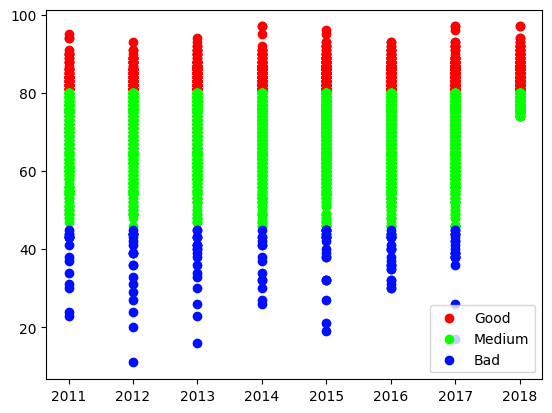

In [17]:
scatter_group_by(new_subset, "release_date", "metascore", "group")

In [19]:
new_subset = new_subset.astype({'release_date':'int'})
new_subset.head()

,release_date,metascore,group
0,2011,95,Good
1,2011,94,Good
2,2011,94,Good
3,2011,91,Good
4,2011,90,Good


In [25]:
list_t = [
    (np.array(tuples[0:1]), tuples[2])
    for tuples in new_subset.itertuples(index=False, name=None)
]

In [24]:
points = [point for point, _ in list_t]
labels = [label for _, label in list_t]

In [26]:
kn = k_nearest_neightbors(
    points,
    labels,
    [np.array([2013, 90]), np.array([2015, 60]), np.array([2016, 80]), np.array([2018, 20])],
    5,
)
print(kn)

[ModeResult(mode=array(['Medium'], dtype='<U6'), count=array([4])), ModeResult(mode=array(['Medium'], dtype='<U6'), count=array([4])), ModeResult(mode=array(['Medium'], dtype='<U6'), count=array([4])), ModeResult(mode=array(['Medium'], dtype='<U6'), count=array([4]))]


<ipython-input-16-5311147554d0>:67: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode([labels[index] for index in point_nearest])
<ipython-input-16-5311147554d0>:67: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode([labels[index] for index in point_nearest])
